In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [26]:
import pandas as pd
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [27]:
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [29]:
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]   # For ROC-AUC


Accuracy: 0.8859408654787546

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.57      0.07      0.13      5931

    accuracy                           0.89     51070
   macro avg       0.73      0.53      0.53     51070
weighted avg       0.85      0.89      0.84     51070


Confusion Matrix:

[[44825   314]
 [ 5511   420]]

ROC-AUC: 0.7554903873256347


In [39]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()


In [43]:
ratio = (len(y_train) - y_train.sum()) / y_train.sum()
ratio = float(ratio)   # ensure it's a plain float
print(ratio)


7.61128909872692


In [45]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=ratio,   # IMPORTANT for imbalance
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [47]:
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("\nROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.7068729195222244

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81     45139
           1       0.23      0.66      0.34      5931

    accuracy                           0.71     51070
   macro avg       0.59      0.69      0.58     51070
weighted avg       0.86      0.71      0.76     51070


Confusion Matrix:
 [[32160 12979]
 [ 1991  3940]]

ROC-AUC: 0.7565511994686944


In [49]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

y_prob = xgb.predict_proba(X_test)[:, 1]

for threshold in np.arange(0.1, 0.9, 0.1):
    y_pred_t = (y_prob > threshold).astype(int)
    print(f"Threshold = {threshold}")
    print("Accuracy:", accuracy_score(y_test, y_pred_t))
    print("Recall for class 1:", classification_report(y_test, y_pred_t).split()[-4])
    print("F1-score:", classification_report(y_test, y_pred_t).split()[-2])
    print("-"*50)


Threshold = 0.1
Accuracy: 0.15901703544155082
Recall for class 1: 0.88
F1-score: 0.11
--------------------------------------------------
Threshold = 0.2
Accuracy: 0.2977481887605248
Recall for class 1: 0.88
F1-score: 0.33
--------------------------------------------------
Threshold = 0.30000000000000004
Accuracy: 0.4539651458782064
Recall for class 1: 0.87
F1-score: 0.53
--------------------------------------------------
Threshold = 0.4
Accuracy: 0.5940473859408655
Recall for class 1: 0.87
F1-score: 0.67
--------------------------------------------------
Threshold = 0.5
Accuracy: 0.7068729195222244
Recall for class 1: 0.86
F1-score: 0.76
--------------------------------------------------
Threshold = 0.6
Accuracy: 0.7937536714313687
Recall for class 1: 0.85
F1-score: 0.82
--------------------------------------------------
Threshold = 0.7000000000000001
Accuracy: 0.8532210691208145
Recall for class 1: 0.85
F1-score: 0.85
--------------------------------------------------
Threshold = 0.8


In [51]:
threshold = 0.8
y_pred_final = (y_prob > threshold).astype(int)


In [53]:
print("Final Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))
print(confusion_matrix(y_test, y_pred_final))


Final Accuracy: 0.8822988055609947
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     45139
           1       0.48      0.17      0.26      5931

    accuracy                           0.88     51070
   macro avg       0.69      0.57      0.60     51070
weighted avg       0.85      0.88      0.86     51070

[[44029  1110]
 [ 4901  1030]]


Get Feature Importance (Bar Plot)

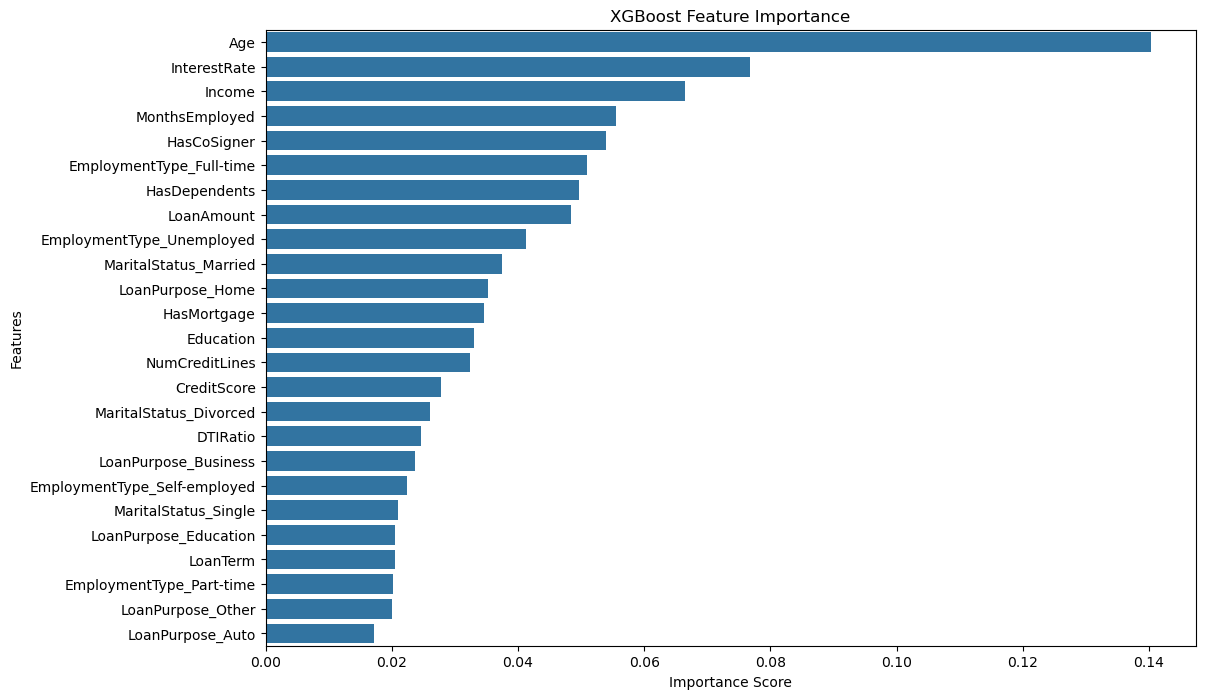

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature importance values
importances = xgb.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=X_train.columns[indices])
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
